# EDA

In [62]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
df_listings_final = pds.read_csv("https://storage.googleapis.com/h3-data/listings_final.csv", sep=";", index_col=0)
df_price_availability = pds.read_csv("https://storage.googleapis.com/h3-data/price_availability.csv", sep=";")

In [47]:
df_listings_final.head()

,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [48]:
df_price_availability.head()

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


In [49]:
df_merge = pds.merge(df_price_availability.groupby('listing_id')['local_price'].mean(), df_listings_final, on='listing_id')

In [50]:
df_merge.head()

,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0


(array([670., 226.,  62.,  18.,   7.,  10.,   3.,   1.,   1.,   1.]),
 array([  17.86372361,  194.13641861,  370.4091136 ,  546.6818086 ,
         722.9545036 ,  899.22719859, 1075.49989359, 1251.77258859,
        1428.04528358, 1604.31797858, 1780.59067358]),
 <BarContainer object of 10 artists>)

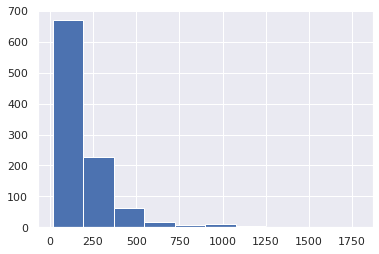

In [71]:
bins = np.arange(0,.1, 1)
plt.hist(df_merge.local_price)

### We can notice that the neighborhood column has 6 % of NAN values

In [61]:
(df_merge.isna().sum()/df_merge.shape[0])*100

listing_id                  0.000000
local_price                 0.000000
name                        0.000000
type                        0.000000
city                        0.000000
neighborhood                6.506507
latitude                    0.000000
longitude                   0.000000
person_capacity             0.000000
beds                        0.000000
bedrooms                    0.000000
bathrooms                   0.000000
is_rebookable               0.000000
is_new_listing              0.000000
is_fully_refundable         0.000000
is_host_highly_rated        0.000000
is_business_travel_ready    0.000000
pricing_weekly_factor       0.000000
pricing_monthly_factor      0.000000
dtype: float64

<AxesSubplot:>

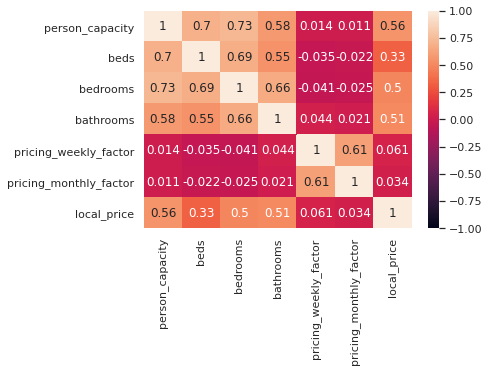

In [69]:
cleans = df_merge[["person_capacity", "beds", "bedrooms", "bathrooms", "pricing_weekly_factor", "pricing_monthly_factor", "local_price"]]
sns.heatmap(cleans.corr(), annot=True, vmin=-1,vmax=1)


### Correlations found :

- beds and person_capacity => strong correlation<br/>
- bedrooms and person_capacity => strong correlation<br/>
- person_capacity and beds => strong correlation

<AxesSubplot:xlabel='pricing_monthly_factor', ylabel='local_price'>

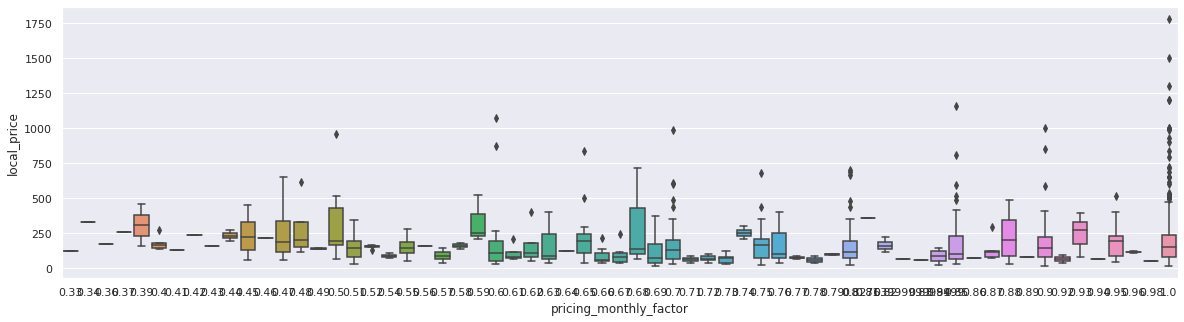

In [73]:
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='pricing_monthly_factor',y='local_price',data=df_merge)